In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xlZ29zZXMvTGlicmFyeS9DbG91ZFN0b3JhZ2UvT25lRHJpdmUtQllVLUlkYWhvL1BIMTM1L3RleHRib29rL2NoYXB0ZXJz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
from math import cos,pi

cos(pi/6)

0.8660254037844387

In [3]:
from sympy import cos,pi,init_printing
init_printing(use_unicode = True)

a=cos(pi/6)
display(a)

In [4]:
from sympy import sqrt

sqrt(8)

In [5]:
from sympy import sqrt,N

N(sqrt(8))

In [6]:
from sympy import Symbol
x = Symbol("x")
a = Symbol("a")
b = Symbol("b")
c = Symbol("c")
x,a,b,c

In [7]:
from sympy import symbols

x,a,b,c = symbols("x a b c")
x,a,b,c

In [8]:
from sympy import symbols
x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c
expression

In [9]:
from sympy import symbols

x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c

newexpression = x * expression
newexpression

In [10]:
from sympy import symbols

x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c

evalDict ={a:2,b:4,c:9,x:4}
expression.subs(evalDict)

In [11]:
from sympy import symbols,cos,sin,simplify
x,y,z = symbols("x y z")
a = simplify(x**2 * z + 4 * x *y*z + 4*y**2*z)
b = simplify(cos(x)**2 + sin(x)**2)
display(a)
display(b)

In [12]:
from sympy import symbols,expand
x = symbols("x")
a = expand((x + 2) * (x - 3))
b = expand((x+3)**2)
display(a)
display(b)

In [13]:
from sympy import Symbol,expand
x = Symbol("x")
expand((x + 1)*(x - 2) - (x - 1)*x)

In [14]:
from sympy import symbols,factor
x,y,z = symbols("x y z")
factor(x**2 * z + 4 * x *y*z + 4*y**2*z)

In [15]:
from sympy import symbols,factor,cos,sin
x,y,z = symbols("x y z")
factor(cos(x)**2 + 2 * cos(x) * sin(x) + sin(x)**2)

In [16]:
from sympy import symbols,collect
x,y,z = symbols("x y z")
collect(x*y + x - 3 + 2 * x**2 - z *x**2 + x**3,x)

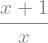

In [17]:
from sympy import symbols,cancel
x,y,z = symbols("x y z")
cancel((x**2 + 2*x + 1)/(x**2 + x))

In [18]:
from sympy import symbols,trigsimp,cos,sin
x = symbols("x")
trigsimp(cos(x)**2 + sin(x)**2)

In [19]:
from sympy import symbols,expand_trig
x,y = symbols("x y")
expand_trig(sin(x + y))

In [20]:
from sympy import symbols,diff,cos
x = symbols("x")
diff(cos(x),x)

In [21]:
from sympy import symbols,diff,cos
x = symbols("x")
diff(cos(x),x,x)

In [22]:
from sympy import symbols,diff,exp
x,y,z = symbols("x y z")
diff(exp(x * y * z),x,y,z,z)

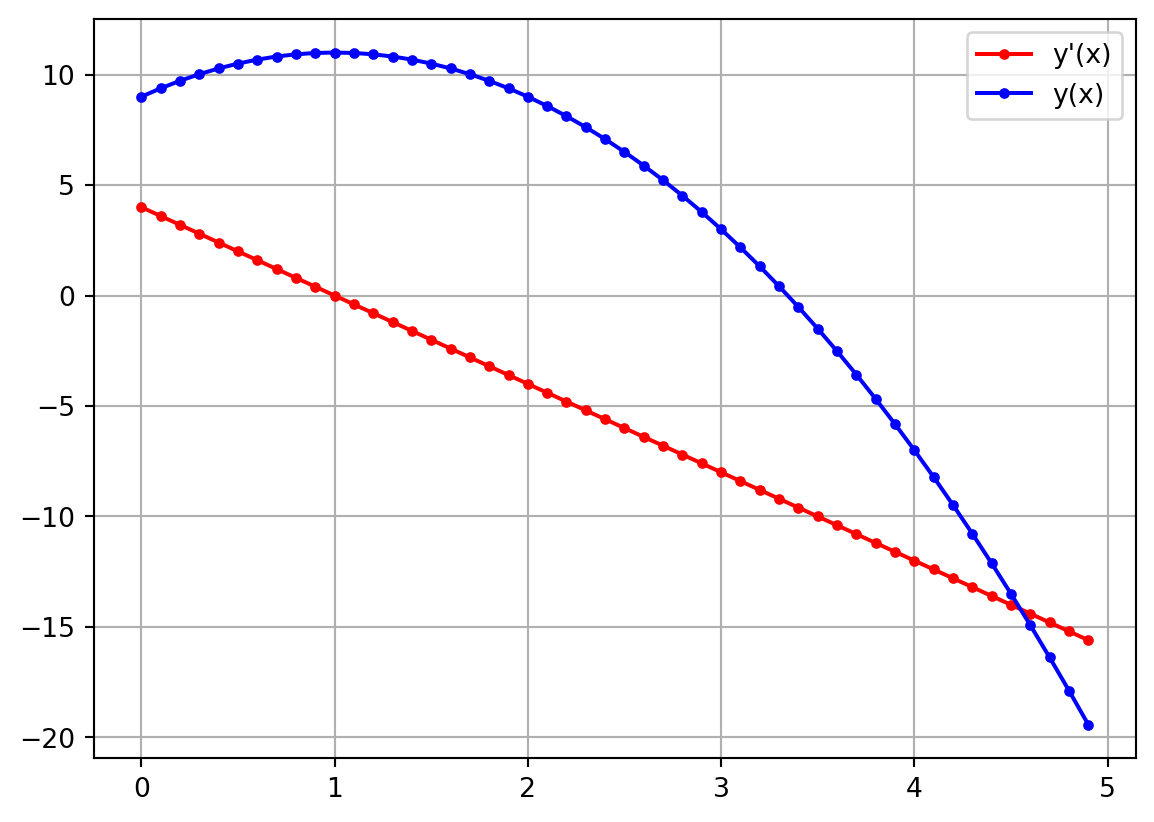

In [23]:
from sympy import symbols,diff
import numpy as np
import matplotlib.pyplot as plt
x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c

newexpression = diff(expression,x)
xarray = np.arange(0,5,0.1)
y = [expression.subs({a:-2,b:4,c:9,x:X}) for X in xarray]
yprime = [newexpression.subs({a:-2,b:4,c:9,x:X}) for X in xarray]
plt.plot(xarray,yprime,'r.-',label= "y'(x)")
plt.plot(xarray,y,'b.-',label= "y(x)")
plt.legend()
plt.grid()
plt.show()

In [24]:
from sympy import integrate, Symbol

x = Symbol("x")

integrate(exp(-x),(x,0,5))

In [25]:
from sympy import integrate, Symbol,oo

x = Symbol("x")

integrate(exp(-x),(x,0,oo))

In [26]:
from sympy import integrate, symbols,oo

x,y = symbols("x y")

integrate(exp(-x**2 - y**2),(x,0,oo),(y,0,oo))

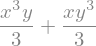

In [27]:
from sympy import integrate, symbols

x,y = symbols("x y")

integrate(x**2 + y**2,x,y)

In [28]:
from sympy import limit, Symbol,sin

x = Symbol("x")

limit(sin(x)/x,x,0)

In [29]:
from sympy import symbols,Eq

x,y = symbols("x y")

equation = Eq(5 * x + 2 * y , 8)
equation

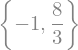

In [30]:
from sympy import symbols,Eq,solveset

x = symbols("x")

equation = Eq(3* x**2 - 5 * x, 8)
solveset(equation,x)

In [31]:
from sympy import symbols,Eq,solveset,sin

x = symbols("x")

equation = Eq(sin(x)/x, 1)
solveset(equation,x)

In [32]:
from sympy import symbols,Eq,solveset,exp

x = symbols("x")

equation = Eq(exp(x), 0)
solveset(equation,x)

In [33]:
from sympy import symbols,Eq,solveset

x = symbols("x")

equation = Eq(x-x, 0)
solveset(equation,x)

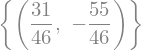

In [34]:
from sympy import symbols,Eq,linsolve

x,y = symbols("x y")

equationOne = Eq(3* x - 5 * y, 8)
equationTwo = Eq(8* x + 2 * y, 3)
linsolve([equationOne,equationTwo],(x,y))

In [35]:
from sympy import symbols,Eq,linsolve

x,y = symbols("x y")

equationOne = Eq(12* x - 3 * y, 8)
equationTwo = Eq(8* x - 2 * y, 3)
linsolve([equationOne,equationTwo],(x,y))

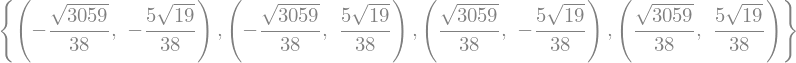

In [36]:
from sympy import symbols,Eq,nonlinsolve

x,y = symbols("x y")


eqOne = Eq(3*x**2 + 5*y**2,8)
eqTwo = Eq(8*x**2 - 12*y**2,13)
nonlinsolve([eqOne,eqTwo],(x,y))

In [37]:
# Python code here

In [38]:
# Python code here

In [39]:
# Python code here

In [40]:
# Python code here

In [41]:
# Python code here

In [42]:
# Python code here